Geopandas and Python
-------------
http://geopandas.org/

GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely. Geopandas further depends on fiona for file access and descartes and matplotlib for plotting.

The goal of GeoPandas is to make working with geospatial data in python easier. It combines the capabilities of pandas and shapely, providing geospatial operations in pandas and a high-level interface to multiple geometries to shapely. GeoPandas enables you to easily do operations in python that would otherwise require a spatial database such as PostGIS.

How to install geopandas: http://geopandas.org/install.html#installing-geopandas

Dependencies
-----------
Installation via conda should also install all dependencies, but a complete list is as follows:
* numpy
* pandas (version 0.15.2 or later)
* shapely
* fiona
* six
* pyproj

Further, optional dependencies are:
* geopy 0.99 (optional; for geocoding)
* psycopg2 (optional; for PostGIS connection)
* rtree (optional; spatial index to improve performance)

For plotting, these additional packages may be used:

* matplotlib
* descartes
* pysal

In [1]:
%matplotlib inline
import geopandas
import pandas as pd

# Visualisation
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

To import a shapefile you can use the following:

In [2]:
linRef = geopandas.read_file('VT_Linear_Referencing_System__EndtoEnd_2014.shp')

If you do not want to unzip the shapefile, you can actually import it directly from a zip.  VFS stands for Virtual File System which is an abstraction layer on top of a more concrete file system. The purpose of a VFS is to allow client applications to access different types of concrete file systems in a uniform way.

In [3]:
fedAid = geopandas.read_file('/VT_Federal_Aid_Urban_Boundaries.shp', vfs='zip://VT_Federal_Aid_Urban_Boundaries.zip')

Just like Pandas, many of the same commands work to view and manipulate the file

In [4]:
linRef.head(3)

,AOTMILES_S,CTCODE,ENDMEASURE,ETE_LR,LENGTH,OBJECTID,Route_ID,SHAPE_MILE,STARTMEASU,Shape_STLe,Shape_ST_1,Shape_ST_2,Shape_ST_3,State_Code,TWN_LR,Year_Recor,geometry
0,1.282,-,0.472,A0051,0.472,1,A0051,0.472,0.000,0,760.308671,760.308671,760.308671,50,-,2014,LINESTRING (538326.5774117857 212383.095637900...
1,1.282,-,1.282,A0051,0.810,2,A0051,0.793,0.472,0,1276.065367,1276.065367,1276.065367,50,-,2014,LINESTRING (538155.057453172 213245.9156458256...
2,0.038,-,0.038,A0051NA001,0.038,3,A0051NA001,0.036,0.000,0,57.704465,57.704465,57.704465,50,-,2014,LINESTRING (538239.8674507886 213021.095638344...


In [5]:
fedAid.head(3)

,OBJECTID,OBJECTID_1,STATEFP,Shape_Leng,Shape_STAr,Shape_STLe,Shape_ST_1,Shape_ST_2,UAName,geometry
0,1,2,50,0.662345,8.699257e+07,62917.449643,8.699257e+07,62917.449643,Rutland,"POLYGON ((462283.7472807991 119744.2254758718,..."
1,2,5,50,0.591941,3.637226e+07,56253.782423,3.637226e+07,56253.782423,Bennington,"POLYGON ((445106.9872694843 39297.37542070934,..."
2,3,6,50,0.985037,1.387593e+08,91905.077540,1.387593e+08,91905.077540,Barre-Montpelier,"POLYGON ((494269.9073027863 201372.155532597, ..."


Plotting
-------
First a quick plot of what is in both of these shape files, one is a series of lines, and the other is a set of polygon vectors.  Matplotlib can deal with these complext shapes although there is a lot that can be done to refine them to better fit your need including adding a basemap.

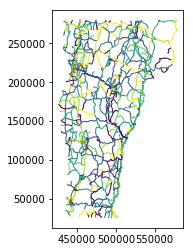

In [6]:
linRef.plot()
plt.show()

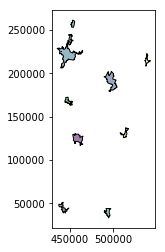

In [7]:
fedAid.plot()
plt.show()

The mathmatical functions common to Python and Numpy can be applied to the geodata objects

In [19]:
fedAidArea = fedAid.geometry.area
fedAidArea

0    8.699257e+07
1    3.637226e+07
2    1.387593e+08
3    2.544343e+08
4    2.167186e+07
5    3.385882e+07
6    3.013370e+07
7    2.177379e+07
8    2.807481e+07
dtype: float64

In [14]:
fedAid.set_index('UAName')

,OBJECTID,OBJECTID_1,STATEFP,Shape_Leng,Shape_STAr,Shape_STLe,Shape_ST_1,Shape_ST_2,geometry
UAName,,,,,,,,,
Rutland,1,2,50,0.662345,8.699257e+07,62917.449643,8.699257e+07,62917.449643,"POLYGON ((462283.7472807991 119744.2254758718,..."
Bennington,2,5,50,0.591941,3.637226e+07,56253.782423,3.637226e+07,56253.782423,"POLYGON ((445106.9872694843 39297.37542070934,..."
Barre-Montpelier,3,6,50,0.985037,1.387593e+08,91905.077540,1.387593e+08,91905.077540,"POLYGON ((494269.9073027863 201372.155532597, ..."
Burlington,4,7,50,2.249055,2.544343e+08,211559.512489,2.544343e+08,211559.512489,"POLYGON ((440053.2872647978 206946.3255362583,..."
St. Albans,5,9,50,0.250999,2.167186e+07,24150.346924,2.167186e+07,24150.346924,"POLYGON ((452085.2872729512 253527.0255690207,..."
Brattleboro,6,10,50,0.457181,3.385882e+07,43985.899333,3.385882e+07,43985.899333,"POLYGON ((494953.3173034703 35104.15541806642,..."
Middlebury,7,11,50,0.523151,3.013370e+07,49104.963761,3.013370e+07,49104.963761,"POLYGON ((450513.2472723935 163501.4455060693,..."
St. Johnsbury,8,12,50,0.464789,2.177379e+07,45414.358699,2.177379e+07,45414.358699,"POLYGON ((537732.4073332608 217175.0055435983,..."
White River Junction,9,0,50,0.540327,2.807481e+07,45471.817395,2.807481e+07,45471.817395,"POLYGON ((514885.2473171381 126768.7654808198,..."


In [20]:
#import json
#import urllib2
#json.load(urllib2.urlopen("https://opendata.arcgis.com/datasets/b9e94f19121d482d9b6d848f4357112a_26.geojson"))

NameError: name 'urlopen' is not defined

In [ ]:
#import geojson

In [11]:
#linRef = linRef.drop(0)